### 첫번째 머신러닝 모델
1. Iris Dataset (붓꽃 데이터)을 활용하여 붓꽃의 품종을 예측하기
2. 지도학습(Supervised Learning)
    - 레이블(답) 이 있는 데이터를 활용하므로 지도학습
    - 붓꽃 데이터의 레이블(종속변수)은 품종(setosa, vesicolor, virginica)
    - 붓꽃 데이터의 입력 데이터(독립변수)는 4가지가 있다.
        - 꽃받침의 길이(Sepal Length), 꽃받침의 폭(Sepal Width)
        - 꽃잎의 길이(Petal Length), 꽃잎의 폭(Petal Width)
    - 지도학습의 타입 중 분류(Classification)에 해당된다. (숫자가 아니라 이름을 예측하기 때문)

### 1. Iris 데이터 로드 및 확인

In [1]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))
print("iris_dataset의 키: \n{}".format(iris_data.keys()))

<class 'sklearn.utils.Bunch'>
iris_dataset의 키: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [2]:
# 입력데이터(독립변수) 확인
# 꽃받침의 길이와 폭, 꽃잎의 길이와 폭
print("data의 크기: {}".format(iris_data['data'].shape))
print(iris_data['feature_names'])
iris_data['data'][:20]

data의 크기: (150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [3]:
# 레이블(종속변수) 확인
# 품종(setosa, vesicolor, virginica)
print(iris_data['target'].shape, type(iris_data['data']))
print(iris_data['target_names'])
iris_data['target']

(150,) <class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
import pandas as pd

iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# target 컬럼을 추가
iris_df['target'] = iris_data['target']
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [6]:
iris_df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [7]:
print(iris_data['target_names'])
dict(enumerate(iris_data['target_names']))

['setosa' 'versicolor' 'virginica']


{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [8]:
# target_desc 컬럼을 추가
iris_df['target_desc'] = iris_df['target'].replace(dict(enumerate(iris_data['target_names'])))
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_desc
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


In [9]:
iris_df['target_desc'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: target_desc, dtype: int64

In [10]:
# 독립변수(입력데이터)를 가져오기
iris_df.iloc[:,0:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
# 종속변수(레이블) 가져오기
iris_df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

### 2. 학습 데이터(train data)와 검증 데이터(test data)로 나누기
* 학습 데이터는 머신러닝 모델을 만들 때 사용하고
* 검증 데이터는 머신러닝이 모델이 얼마나 잘 동작하는지 측정할 때 사용
    - 150건의 75%를 학습데이터로, 25%를 검증 데이터로 나누기
    - scikit-learn에서 제공하는 tran_test_split() 함수를 사용
* 학습, 검증 데이터 둘 다 독립변수와 종속변수로 나눠야 한다.
    - 독립변수(입력데이터)는 X 로 표시하고
    - 종속변수(레이블)는 y로 표시한다. f(x) = y
    - 훈련데이터의 독립변수는 X_train, 종속변수는 y_train
    - 검증데이터의 독립변수는 X_test, 종속변수는 y_test
* 학습을 담당할 모델(알고리즘)을 선택
    - k-nn(k nearest neighbors) 알고리즘 사용
    - 학습을 할때는 fit() 함수 사용
    - 예측할 때는 predict() 함수 사용

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:, 0:4], iris_df['target'], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(iris_df.iloc[:, 0:4], iris_df['target'])

print('Train : ', X_train.shape, y_train.shape)
print('Test : ', X_test.shape, y_test.shape)

Train :  (112, 4) (112,)
Test :  (38, 4) (38,)


### K-NN (최근접 이웃) 알고리즘

In [13]:
from sklearn.neighbors import KNeighborsClassifier # 분류 방식에 사용
#from sklearn.neighbors import KNeighborsRegressor # 회귀 방식에 사용

model = KNeighborsClassifier(n_neighbors=3)
# 학습 > fit(훈련데이터 독립변수, 훈련데이터 종속변수)
model.fit(X_train, y_train)
print(model)

KNeighborsClassifier(n_neighbors=3)


In [14]:
# 예측 predict(검증데이터 독립변수)
prediction = model.predict(X_test)
prediction

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [15]:
import numpy as np
from sklearn.metrics import accuracy_score

# 예측한 값(prediction)과 검증 데이터 종속변수를 비교
print('정확도 점수 : {:.2f}'.format(np.mean(prediction == y_test)))
print('정확도 점수 : {:.2f}'.format(accuracy_score(prediction, y_test)))

정확도 점수 : 1.00
정확도 점수 : 1.00


### Decision Tree (의사결정트리) 알고리즘
* 의사결정 트리 과정을 시각화 하기 위해서 Graphviz 라는 툴 설치 필요
* pip install graphviz
* http://www.graphviz.org/download/ 에서 OS에 맞는 설치파일 다운로드

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=11)
model

DecisionTreeClassifier(max_depth=3, random_state=11)

In [33]:
# 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=11)

In [34]:
# 학습한 과정 시각화
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names)

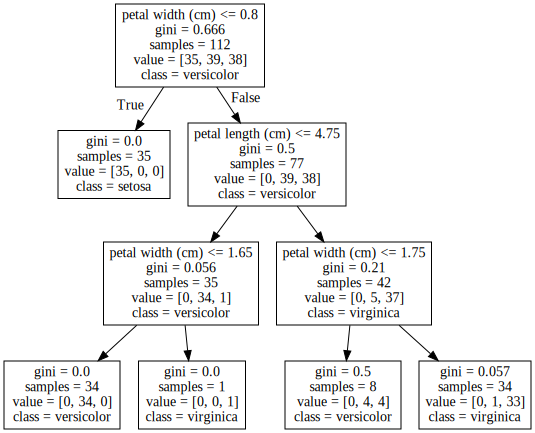

In [35]:
with open('tree.dot') as file:
    dot_graph = file.read()
    
graphviz.Source(dot_graph)

In [38]:
# 예측하기
y_predic = model.predict(X_test)
y_predic

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [40]:
# 예측의 정확도 점수 확인
print('예측 정확도 {0:.4f}'.format(np.mean(y_predic == y_test)))
print('예측 정확도 {0:.4f}'.format(accuracy_score(y_predic, y_test)))

예측 정확도 1.0000
예측 정확도 1.0000
